<a href="https://colab.research.google.com/github/sasumwen/DogVision/blob/main/dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision"

# End-to-end multi-class dog breed classification

This notebook builds an end2end multiclass dog breed classification using tensorflow hub and tensorflow 2.0

data is got from kaggle dog breed identification competition

In [2]:
# import TensorFlow and tf hub into colab
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__) 
print(hub.__version__)

2.9.2
0.12.0


In [3]:
# check for GPU availability
print("GPU available" if tf.config.list_physical_devices("GPU")else "not available")

GPU available


## Getting the data ready
(turning into tensors)

In [4]:
# checkout data labels
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")

In [5]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


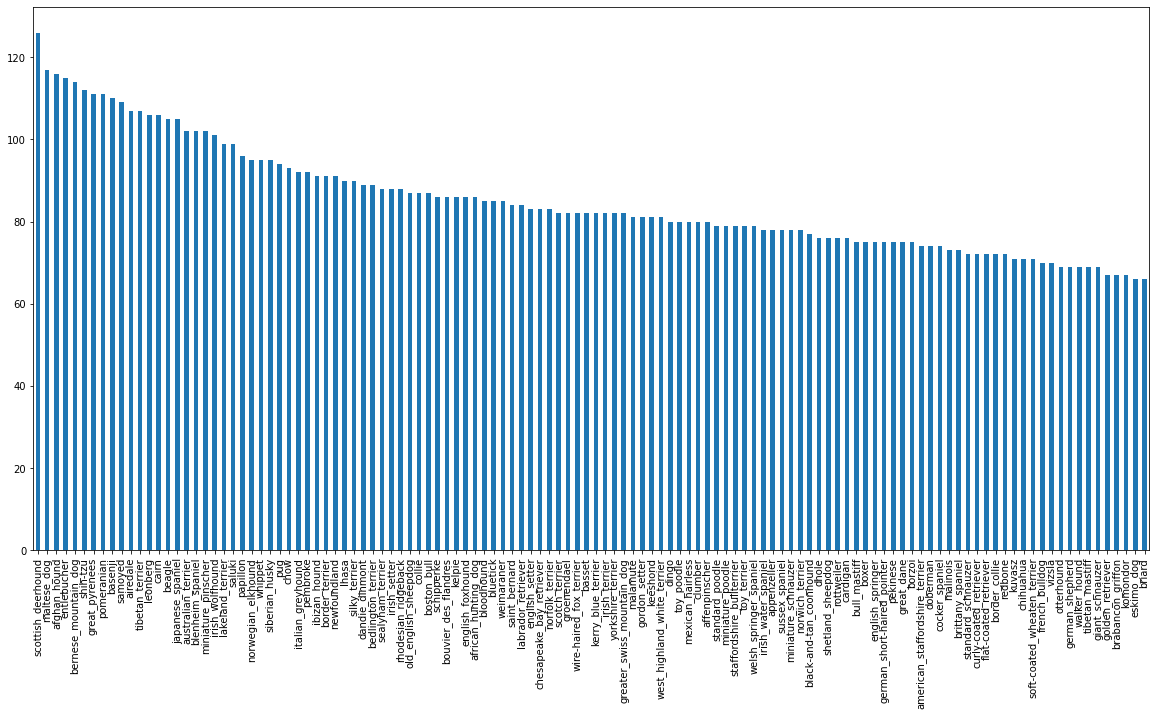

In [6]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

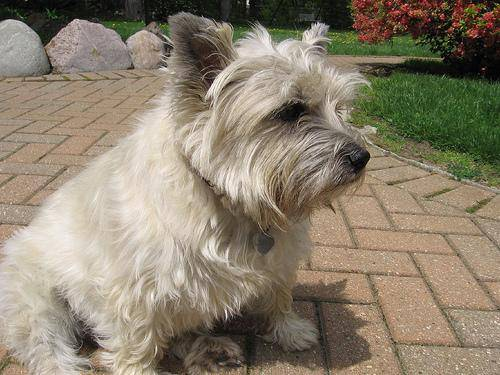

In [7]:




#view an image
from IPython.display import Image
Image("/content/drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg")

# Getting images and their labels



In [8]:
# create pathnames from image ID's

filenames = ["drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

In [9]:
filenames[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train/")) == len(filenames):
  print("proceed")
else:
  print("error")
  

proceed


In [11]:
len(filenames)

10222

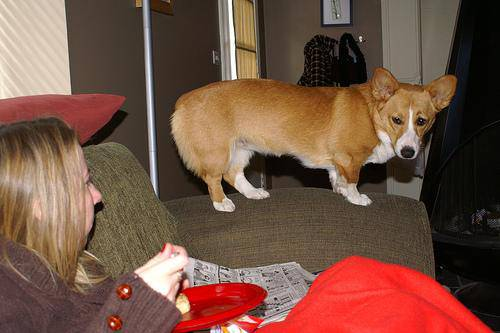

In [12]:
Image(filenames[10000])

In [13]:
labels_csv["breed"][10000]

'pembroke'

## Preparing labels

In [15]:
import numpy as np
labels = labels_csv["breed"].to_numpy()

In [16]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [17]:
#check if labels matches filenames in length
if len(labels) == len(filenames):
  print("on track")
else:
  print('error')

on track
